# DA Final project:

# Eradication of the phenomenon of obesity

###  Name of students:

##### Lavi Tal
##### Omeisy Nadav
##### Peretz Nitzan


#### Group number 8
<div>
<img src = "https://github.com/omeysi1/project1/blob/main/IMG_8873.jpg?raw=true" width="900"/> 
</div>




# <b id="section_2">  </b> <b style='color:#F05454'>1. Relevant libraries </b> <b></b> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import numpy as np
import requests
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

# <b id="section_2">  </b> <b style='color:#F05454'>2. dtypes & info </b> <b></b> 

#### Information on the data
מטרת הפרוייקט היא לאבחן את תופעת השמנת היתר במקסיקו, פרו וקולומביה על פי הרגלי אכילה, פעילות גופנית והרגלים נוספים ,תוך מטרת על לצמצום התופעה  <br>נלקח מ [Kaggle](https://www.kaggle.com/datasets/muhramasaputra/obesity-based-on-eating-habits-and-physical-cond)

23% of the data was collected directly from users through a survey conducted by Fabio Mendoza Palechor and Alexis de la Hoz Manotas in a web platform and 77% of the data was generated synthetically using the Weka tool and the SMOTE filter.

In [2]:
url = 'https://raw.githubusercontent.com/omeysi1/project1/main/obesity.csv'
ob_df = pd.read_csv(url)
ob_df.shape

(2111, 19)

In [3]:
ob_df.columns

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking',
       'NObeyesdad'],
      dtype='object')

In [4]:
ob_df

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,0,0,0,1,0,0
1,0,21.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,0,0,0,1,0,0
2,1,23.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,0,0,0,1,0,0
3,1,27.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0,0,0,0,1,0
4,1,22.000000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,0,0,1,0,1
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,0,0,1,0,1
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,0,0,1,0,1
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,0,0,1,0,1


In [5]:
ob_df.isnull().sum()

Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
Automobile                        0
Bike                              0
Motorbike                         0
Public_Transportation             0
Walking                           0
NObeyesdad                        0
dtype: int64

In [6]:
ob_df.dtypes

Gender                              int64
Age                               float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
Automobile                          int64
Bike                                int64
Motorbike                           int64
Public_Transportation               int64
Walking                             int64
NObeyesdad                          int64
dtype: object

נשנה ערכים בינאריים ממספרים עשרוניים לשלמים

In [7]:
ob_df['Age'] = ob_df['Age'].astype(int)
ob_df['FAVC'] = ob_df['FAVC'].astype(int)
ob_df['FCVC'] = ob_df['FCVC'].astype(int)
ob_df['NCP'] = ob_df['NCP'].astype(int)
ob_df['CH2O'] = ob_df['CH2O'].astype(int)
ob_df['FAF'] = ob_df['FAF'].astype(int)
ob_df['TUE'] = ob_df['TUE'].astype(int)
ob_df.dtypes

Gender                            int64
Age                               int32
family_history_with_overweight    int64
FAVC                              int32
FCVC                              int32
NCP                               int32
CAEC                              int64
SMOKE                             int64
CH2O                              int32
SCC                               int64
FAF                               int32
TUE                               int32
CALC                              int64
Automobile                        int64
Bike                              int64
Motorbike                         int64
Public_Transportation             int64
Walking                           int64
NObeyesdad                        int64
dtype: object

In [8]:
ob_df

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21,1,0,2,3,1,0,2,0,0,1,0,0,0,0,1,0,0
1,0,21,1,0,3,3,1,1,3,1,3,0,1,0,0,0,1,0,0
2,1,23,1,0,2,3,1,0,2,0,2,1,2,0,0,0,1,0,0
3,1,27,0,0,3,3,1,0,2,0,2,0,2,0,0,0,0,1,0
4,1,22,0,0,2,1,1,0,2,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1,1,3,3,1,0,1,0,1,0,1,0,0,0,1,0,1
2107,0,21,1,1,3,3,1,0,2,0,1,0,1,0,0,0,1,0,1
2108,0,22,1,1,3,3,1,0,2,0,1,0,1,0,0,0,1,0,1
2109,0,24,1,1,3,3,1,0,2,0,1,0,1,0,0,0,1,0,1


# <b id="section_2">  </b> <b style='color:#F05454'>Functions </b> <b></b> 

In [9]:
# פונק' המציגה את הערך של כל עמודה בגרף על גבי הגרף מחולק עפ"י מספרים שלמים ומספרים עשרוניים
def annotate_barplot(ax, df, x_col, y_col):
    for p in plt.gca().patches:
        plt.gca().annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points',
                       fontsize=8)


def annotate_barplot_int(ax, df, x_col, y_col):
    for p in ax.patches:
        ax.annotate(int(p.get_height()), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points',
                    fontsize=8)

# <b id="section_2">  </b> <b style='color:#F05454'>Correlations </b> <b></b> 

<Axes: >

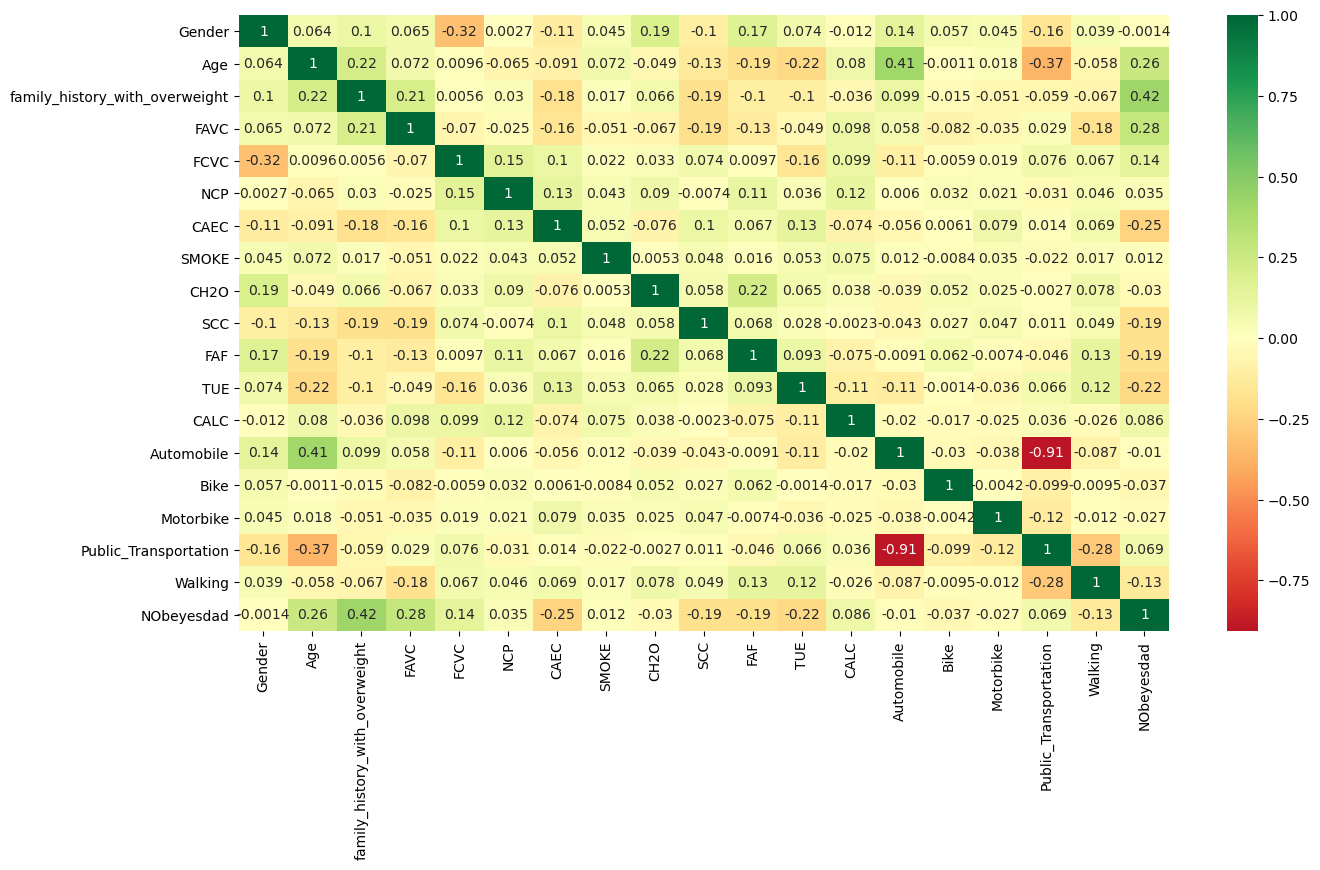

In [10]:
corrs = ob_df.corr(method = 'kendall', numeric_only=True)
plt.figure(figsize=(15,8)) 
sns.heatmap(corrs, cmap='RdYlGn', center=0, annot = True)

# <b id="section_2">  </b> <b style='color:#F05454'>Correlations With Diagnosed Obesity </b> <b></b> 

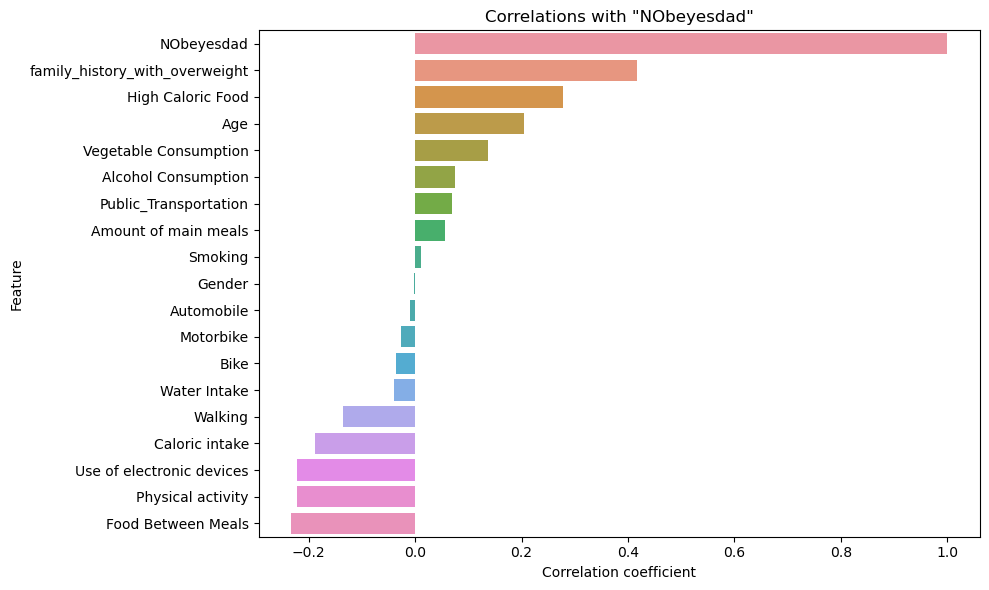

In [11]:
correlations = ob_df.corr()["NObeyesdad"].sort_values(ascending=False)
limit = -1.0
relevant_correlations = correlations[correlations > limit]

# Map original column names to desired labels
labels_map = {
    "CH2O": "Water Intake",
    "SMOKE": "Smoking",
    "FCVC": "Vegetable Consumption",
    "FAVC": "High Caloric Food",
    "CAEC": "Food Between Meals",
    "CALC": "Alcohol Consumption",
    "NCP": "Amount of main meals",
    "SCC": "Caloric intake",
    "TUE": "Use of electronic devices",
    "FAF": "Physical activity"
}

# Prepare labels and correlations for plotting
labels = [labels_map.get(col, col) for col in relevant_correlations.index]
corr = relevant_correlations.values

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "NObeyesdad"')
plt.xlabel('Correlation coefficient')
plt.ylabel('Feature')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


מגרף הקורולציות הממוקד באנשים המאובחנים עם השמנת יתר ניתן לראות קשר חזק בין השמנת יתר להיסטוריה משפחתית. 
לכן, ראשית נתמקד בלחקור תופעה זו.

# <b id="section_2">  </b> <b style='color:#F05454'>Observation 1 - Family History</b> <b></b> 

In [12]:
ob_df['family_history_with_overweight'].value_counts()

family_history_with_overweight
1    1726
0     385
Name: count, dtype: int64

In [13]:
ob_df.groupby('family_history_with_overweight')[['NObeyesdad']].sum()

,NObeyesdad
family_history_with_overweight,
0,8
1,964


 ניתן להבחין בהבדלים משמעותיים ביחס בין כמות המאובחנים בהשמנת יתר בעלי היסטוריה משפחתית לבין אלה שאינם בעלי היסטוריה משפחתית

 
:נציג את כמויות המאובחנים באופן יחסי

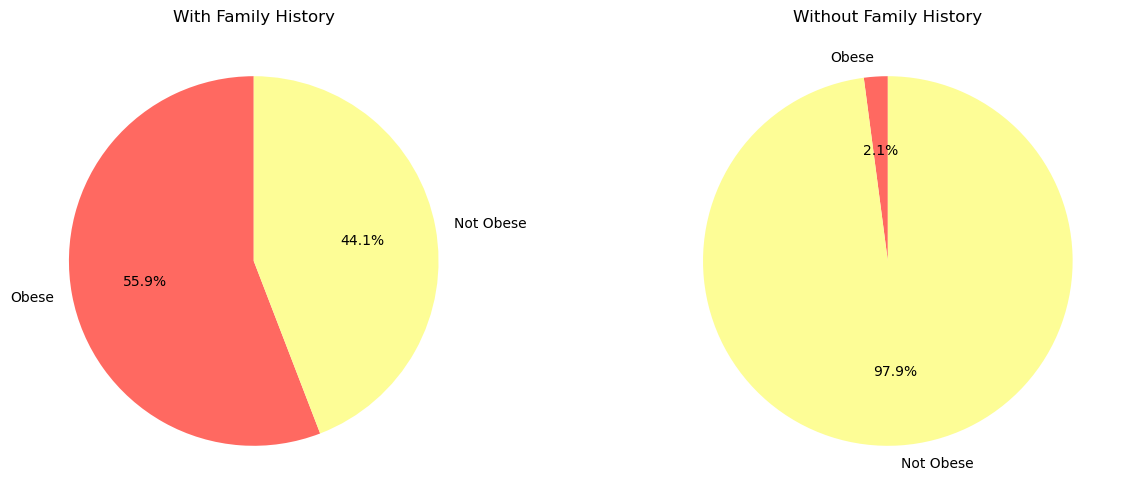

In [14]:
colors = ["#FF6961", "#FDFD96"]

# Calculate obesity counts based on family history
obesity_counts_with = ob_df[ob_df['family_history_with_overweight'] == 1]['NObeyesdad'].value_counts()
obesity_counts_without = ob_df[ob_df['family_history_with_overweight'] == 0]['NObeyesdad'].value_counts()

labels = ['Obese', 'Not Obese']

sizes_with = [obesity_counts_with.get(1, 0), obesity_counts_with.get(0, 0)]
sizes_without = [obesity_counts_without.get(1, 0), obesity_counts_without.get(0, 0)]

# Create pie charts
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax[1].pie(sizes_without, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax[1].set_title('Without Family History')

ax[0].pie(sizes_with, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax[0].set_title('With Family History')

plt.show()

.ניתן לראות בבירור כי אנשים בעלי עבר משפחתי מאובחנים יותר בהשמנת יתר לעומת אלו שללא עבר משפחתי

כעת נתמקד בהרגלי אכילה, עישון ופעילות גופנית על מנת לאבחן התנהגויות בין הקבוצות

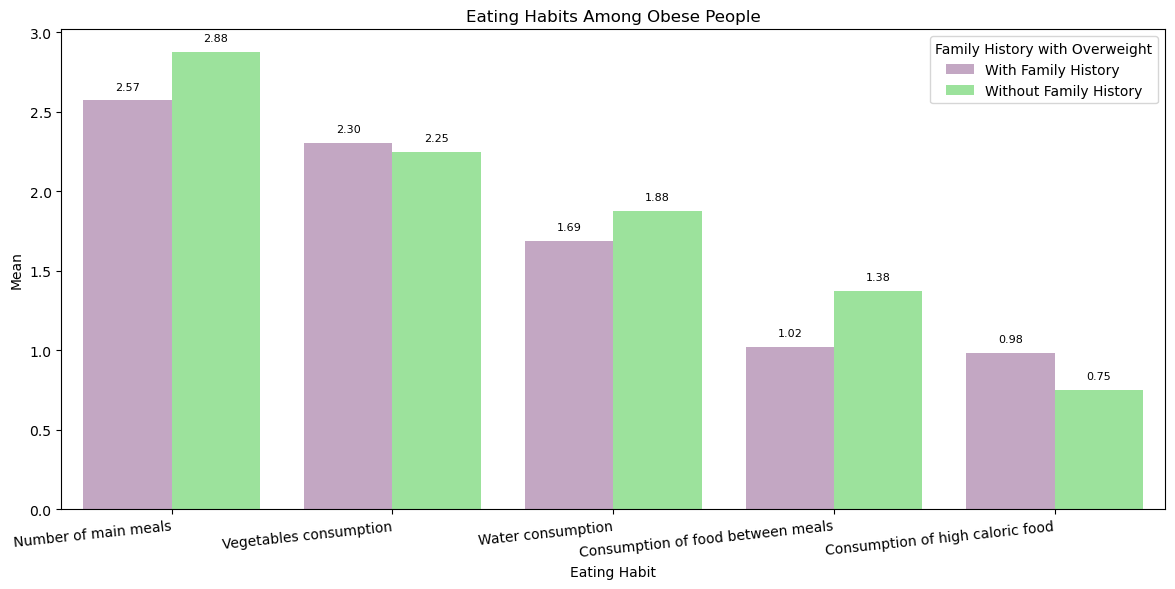

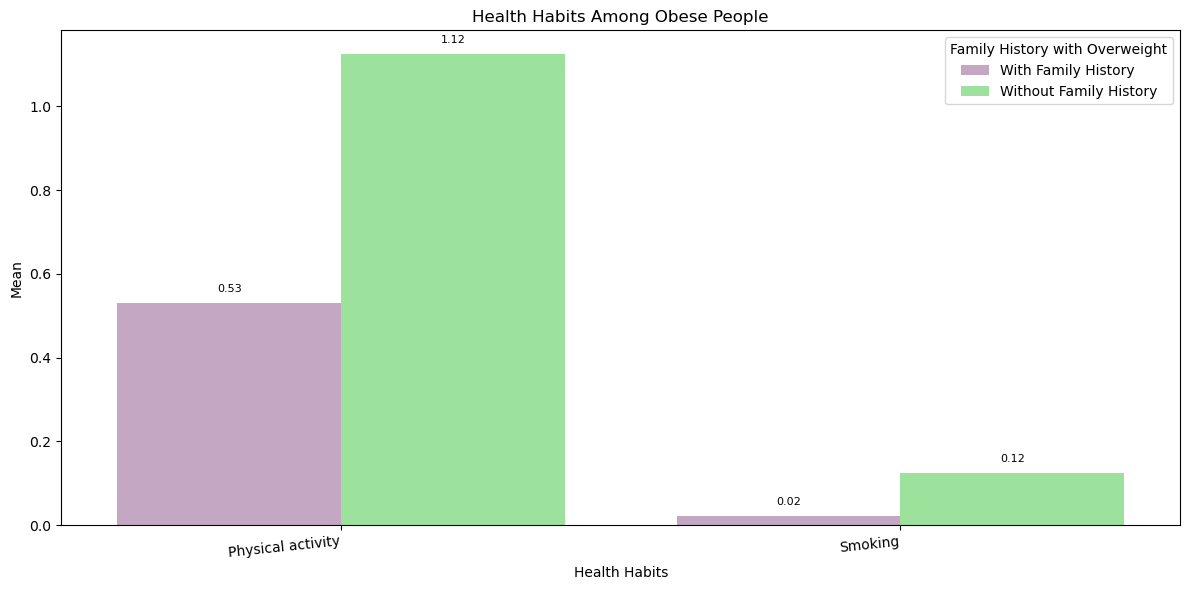

In [15]:
colors2 = ["#C8A2C8", "#90EE90"]

# Filter data for individuals with a family history of being overweight and obese
with_family_history = ob_df[ob_df['NObeyesdad'] == 1]

eating_habits = {
    'NCP': 'Number of main meals',
    'FCVC': 'Vegetables consumption',
    'CH2O': 'Water consumption',
    'CAEC': 'Consumption of food between meals',
    'FAVC': 'Consumption of high caloric food'
}

other_habits = {
    'FAF': 'Physical activity',
    'SMOKE': 'Smoking'
}
        
grouped_eating = with_family_history.groupby('family_history_with_overweight')[list(eating_habits.keys())].mean().reset_index()
df_eating_long = pd.melt(grouped_eating, id_vars='family_history_with_overweight', value_vars=list(eating_habits.keys()), var_name='Habit', value_name='Proportion')

df_eating_long['Habit'] = df_eating_long['Habit'].map(eating_habits)

# creat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_eating_long, x='Habit', y='Proportion', hue='family_history_with_overweight', hue_order=[1, 0], dodge=True, palette=colors2)
plt.title('Eating Habits Among Obese People')
plt.xlabel('Eating Habit')
plt.ylabel('Mean')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['With Family History', 'Without Family History'], title='Family History with Overweight', loc='upper right')

annotate_barplot(plt.gca(), df_eating_long, 'Habit', 'Proportion')

plt.xticks(rotation=6, ha='right') 
plt.tight_layout()  
plt.show()

# Calculate proportions for smoking and activity habits
grouped_other = with_family_history.groupby('family_history_with_overweight')[list(other_habits.keys())].mean().reset_index()
df_other_long = pd.melt(grouped_other, id_vars='family_history_with_overweight', value_vars=list(other_habits.keys()), var_name='Habit', value_name='Proportion')

df_other_long['Habit'] = df_other_long['Habit'].map(other_habits)

# creat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_other_long, x='Habit', y='Proportion', hue='family_history_with_overweight', hue_order=[1, 0], dodge=True, palette=colors2)
plt.title('Health Habits Among Obese People')
plt.xlabel('Health Habits')
plt.ylabel('Mean')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['With Family History', 'Without Family History'], title='Family History with Overweight', loc='upper right')

annotate_barplot(plt.gca(), df_eating_long, 'Habit', 'Proportion')

plt.xticks(rotation=6, ha='right') 
plt.tight_layout()  

plt.show()

הגרף הראשון מראה את הקשר בין הרגלי אכילה בקרב החולים אל מול עבר משפחתי

הגרף השני מראה את הקשר בין פעילות גופנית ועישון בקרב החולים אל מול עבר משפחתי

# <b id="section_2">  </b> <b style='color:black, font-weight:bold, font-size:12px'>סיכום</b> <b></b> 

מהנראה לעיל ניתן לראות כי אחד הגורמים העיקריים להשמנת יתר הוא היסטוריה משפחתית. בנוסף, ראינו מניתוח מעמיק של הדאטה שבקרב אנשים בעלי השמנת יתר אין הבדלים מהותיים בהרגלי האכילה בין אלו בעלי עבר משפחתי לאלו ללא עבר משפחתי.

כן ניתן להבחין בכך שחולים בעלי עבר משפחתי מבצעים פחות פעילות גופנית באופן משמעותי מחולים שאינם בעלי עבר משפחתי

# <b id="section_2">  </b> <b style='color:#F05454'>Observation 2 - Age </b> <b></b> 

:נבחן את הנתונים לפי התפלגות גילאים בקרב חולים בהשמנת יתר

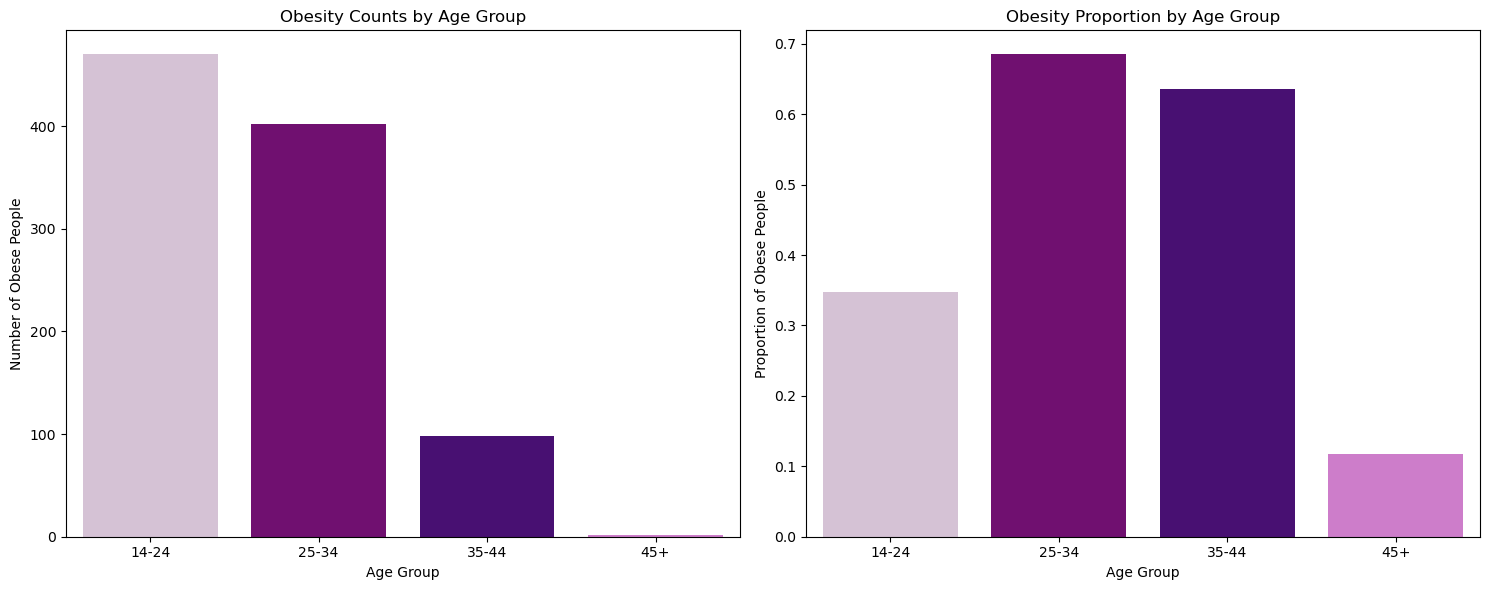

In [16]:
# Define age group bins and labels
bins = [14, 25, 35, 45, float('inf')]
labels = ['14-24', '25-34', '35-44', '45+']

ob_df['AgeGroup'] = pd.cut(ob_df['Age'], bins=bins, labels=labels, right=False)

#data relevant groupby
groupbyage_counts = ob_df.groupby('AgeGroup')['NObeyesdad'].sum().reset_index()
groupbyage_proportion = ob_df.groupby('AgeGroup')['NObeyesdad'].mean().reset_index()

colors = ["#D8BFD8", "#800080", "#4B0082", "#DA70D6"]

#Bar plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

#first plot
sns.barplot(data=groupbyage_counts, x='AgeGroup', y='NObeyesdad', palette= colors, ax=ax1)
ax1.set_title('Obesity Counts by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Number of Obese People')
ax1.set_xticklabels(labels, rotation=0)

# Second plot
sns.barplot(data=groupbyage_proportion, x='AgeGroup', y='NObeyesdad', palette=colors, ax=ax2)
ax2.set_title('Obesity Proportion by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Proportion of Obese People')
ax2.set_xticklabels(labels, rotation=0)

plt.tight_layout()
plt.show()

מהגרף השמאלי ניתן להבחין כי מבין החולים בהשמנת יתר קבוצת הגילאים המרכזית שנתוניה מוצגים בדאטה היא בני 14-34 ולכן בחרנו להתמקד בקבוצה זאת.

בחרנו בממוקד בהרגלים הרלוונטים לגילאים אלה כגון עישון, שתייה אלכוהול וכדומה.

נציג עפ"י התפלגות מגדרית

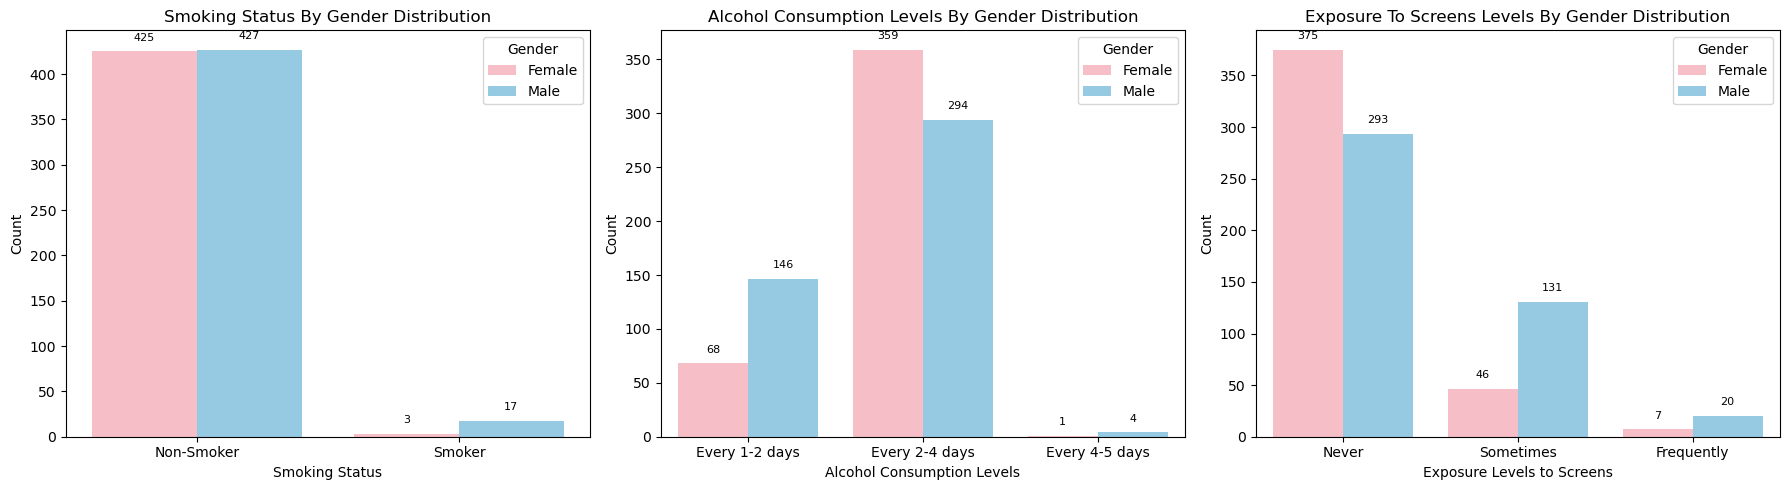

In [17]:
colors_by_gender = ["#FFB6C1", "#89CFF0"]

# Filter data by relevant age
filtered_data = ob_df[(ob_df['Age'] <= 34) & (ob_df['NObeyesdad'] == 1)]

#Bar plots
plt.figure(figsize=(18, 5))

#First Plot
plt.subplot(1, 3, 1)
smoking_counts = filtered_data.groupby(['SMOKE', 'Gender']).size().reset_index(name='count')
smoking_counts['SMOKE'] = smoking_counts['SMOKE'].map({0: 'Non-Smoker', 1: 'Smoker'})
sns.barplot(x='SMOKE', y='count', hue='Gender', data=smoking_counts, palette=colors_by_gender)
plt.title('Smoking Status By Gender Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')

annotate_barplot_int(plt.gca(), smoking_counts, 'SMOKE', 'count')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Female', 'Male'], title='Gender', loc='upper right')

#Secons Plot
plt.subplot(1, 3, 2)
alcohol_counts = filtered_data.groupby(['CALC', 'Gender']).size().reset_index(name='count')
sns.barplot(x='CALC', y='count', hue='Gender', data=alcohol_counts, palette=colors_by_gender)
plt.title('Alcohol Consumption Levels By Gender Distribution')
plt.xlabel('Alcohol Consumption Levels')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Every 1-2 days', 'Every 2-4 days', 'Every 4-5 days'])

annotate_barplot_int(plt.gca(), alcohol_counts, 'CALC', 'count')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Female', 'Male'], title='Gender', loc='upper right')

#Third Plot
plt.subplot(1, 3, 3)
screens_counts = filtered_data.groupby(['TUE', 'Gender']).size().reset_index(name='count')
sns.barplot(x='TUE', y='count', hue='Gender', data=screens_counts, palette=colors_by_gender)
plt.title('Exposure To Screens Levels By Gender Distribution')
plt.xlabel('Exposure Levels to Screens')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Never', 'Sometimes', 'Frequently'])

annotate_barplot_int(plt.gca(), screens_counts, 'TUE', 'count')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Female', 'Male'], title='Gender', loc='upper right')

plt.tight_layout()
plt.show()

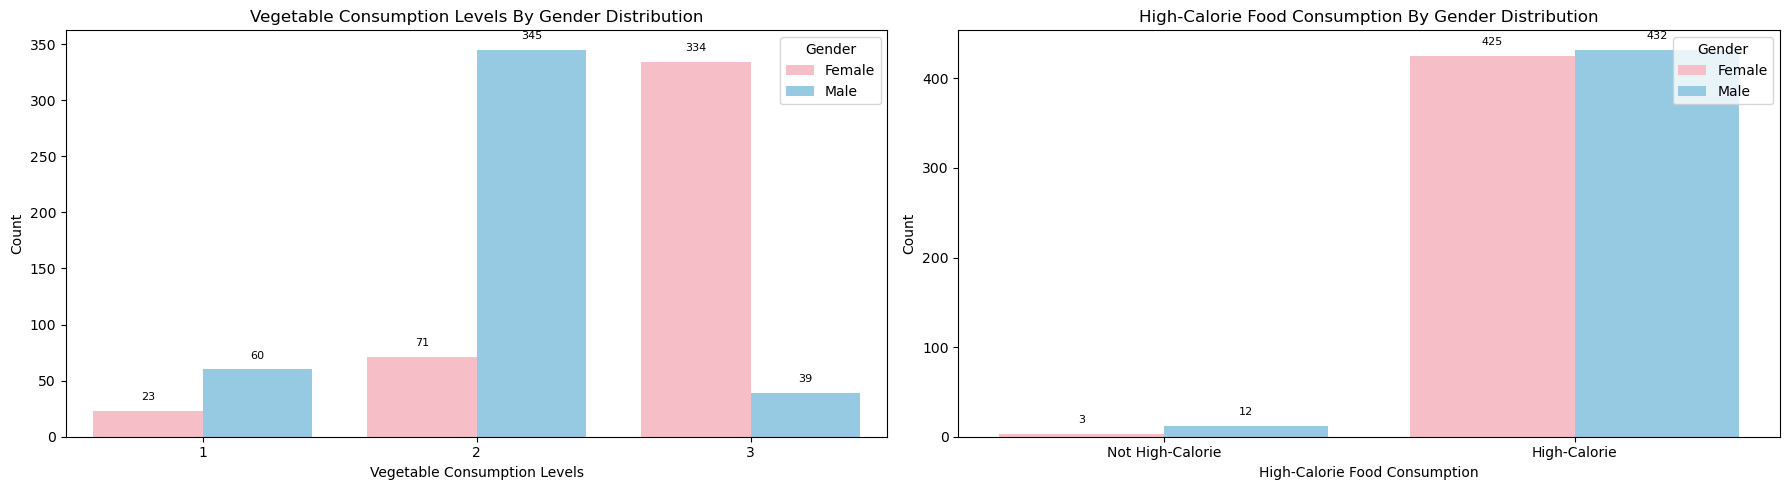

In [18]:
#Bar plots
plt.figure(figsize=(18, 5))

#First Plot
plt.subplot(1, 2, 1)
vegetable_counts = filtered_data.groupby(['FCVC', 'Gender']).size().reset_index(name='count')
sns.barplot(x='FCVC', y='count', hue='Gender', data=vegetable_counts, palette= colors_by_gender)
plt.title('Vegetable Consumption Levels By Gender Distribution')
plt.xlabel('Vegetable Consumption Levels')
plt.ylabel('Count')

annotate_barplot_int(plt.gca(), df_eating_long, 'FCVC', 'count')
plt.gca().legend(handles, ['Female', 'Male'], title='Gender', loc='upper right')


#Second Plot
plt.subplot(1, 2, 2)
calorie_counts = filtered_data.groupby(['FAVC', 'Gender']).size().reset_index(name='count')
calorie_counts['FAVC'] = calorie_counts['FAVC'].map({0: 'Not High-Calorie', 1: 'High-Calorie'})
sns.barplot(x='FAVC', y='count', hue='Gender', data=calorie_counts, palette= colors_by_gender)
plt.title('High-Calorie Food Consumption By Gender Distribution')
plt.xlabel('High-Calorie Food Consumption')
plt.ylabel('Count')

annotate_barplot_int(plt.gca(), df_eating_long, 'FAVC', 'count')
plt.gca().legend(handles, ['Female', 'Male'], title='Gender', loc='upper right')

plt.tight_layout()
plt.show()

# <b id="section_2">  </b> <b style='color:black, font-weight:bold, font-size:12px'>סיכום</b> <b></b> 

כאשר ראינו כי קבוצת הגילאים המרכזית בין החולים בהשמנת יתר היא בני 14-34 התעמקנו בחקירת קבוצה זו על מנת להסיק את נק' החולשה והחוזקה המאפיינת אותם. 

ניתן לראות כי על מנת למגר את תופעת השמנת היתר בקרב אוכלוסייה זאת יש להתמקד בהעלאת המודעות לצריכת מזון שאינו עתיר בקלוריות, הפחתת צריכת אלכוהול וצריכת ירקות.

האפיון מוצג עפ"י התפלגות מגדרית על מנת לבחון האם יש קשר בין הפרמטרים השונים למגדר וזאת על מנת למקד את ניתוח האוכלוסייה בראופן ספיציפי יותר היכול להועיל ברמה גבוהה יותר בהמשך הטיפול בהשמנת יתר ובמיגור תופעה זו.

אצל נשים וגברים כאחד יש להתמקד בהפחתת צריכת האלכוהול והפחתת צריכת אוכל עתיר בקלוריות

אצל גברים יש לשים דגש נוסף על צריכת ירקות ושילובם בתזונה 


# <b id="section_2">  </b> <b style='color:#F05454'>Observation 3 - Walking </b> <b></b> 

:נבדוק את הרגלי ההתניידות של הנבחנים במחקר 

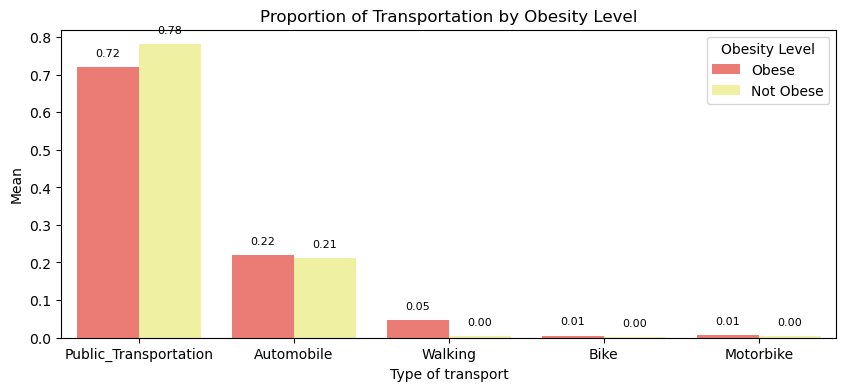

In [19]:
features = [ 'Public_Transportation', 'Automobile', 'Walking', 'Bike', 'Motorbike']
grouped_data_features = ob_df.groupby('NObeyesdad')[features].mean().reset_index()

#Filter Data
df_long = pd.melt(grouped_data_features, id_vars='NObeyesdad', value_vars=features,
                  var_name='Feature', value_name='Proportion')

colors = ["#FF6961", "#FDFD96"]

#Bar Plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Feature', y='Proportion', hue='NObeyesdad', data=df_long, palette=colors)
plt.title('Proportion of Transportation by Obesity Level')
plt.xlabel('Type of transport')
plt.ylabel('Mean')

annotate_barplot(plt.gca(), df_eating_long, 'Feature', 'Proportion')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Obese', 'Not Obese'], title='Obesity Level', loc='upper right')

plt.show()

 :ניתן לראות בגרף שיש יחס חיובי בין הליכה לבין אנשים שאינם סובלים מהשמנת יתר ולכן נתמקד באוכלוסייה זאת

In [20]:
walkers = ob_df[ob_df['Walking'] == 1]
walking_ob = walkers.groupby('NObeyesdad').size().reset_index(name='Count')
walking_ob 

,NObeyesdad,Count
0,0,53
1,1,3


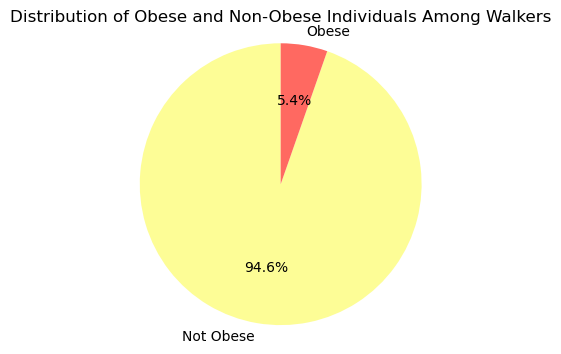

In [21]:
labels = ['Not Obese', 'Obese']
sizes = walking_ob['Count']
colors = ["#FDFD96", "#FF6961"]
explode = (0, 0)  # explode 1st slice

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Obese and Non-Obese Individuals Among Walkers')
plt.axis('equal')

plt.show()

ניתן לראות בבירור כי בקרב ההולכים יש רוב מוחלט שאינו חולה בהשמנת יתר

:כעת, נבחן בתוך אוכלוסייה זו את השפעת ההיסטוריה המשפחתית

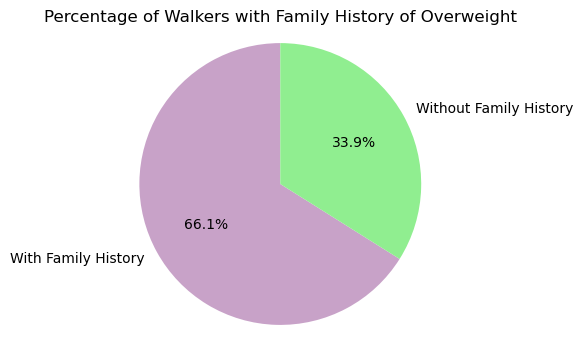

In [22]:
# Filter Data
walkers_with_family_history = ob_df[(ob_df['Walking'] == 1) & (ob_df['family_history_with_overweight'] == 1)]

sizes = [len(walkers_with_family_history), len(ob_df[ob_df['Walking'] == 1]) - len(walkers_with_family_history)]
labels = ['With Family History', 'Without Family History']
colors2 = ["#C8A2C8", "#90EE90"]

# Pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors2, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Walkers with Family History of Overweight')
plt.axis('equal')

plt.show()

למרבית הנחקרים אשר הולכים קיימת היסטוריה משפחתית של השמנת יתר

על כן, נתמקד באיפיון אוכלוסייה זאת בפרמטרים שונים ומגוונים על מנת לאפיין אורח חיים נכון המונע את המחלה

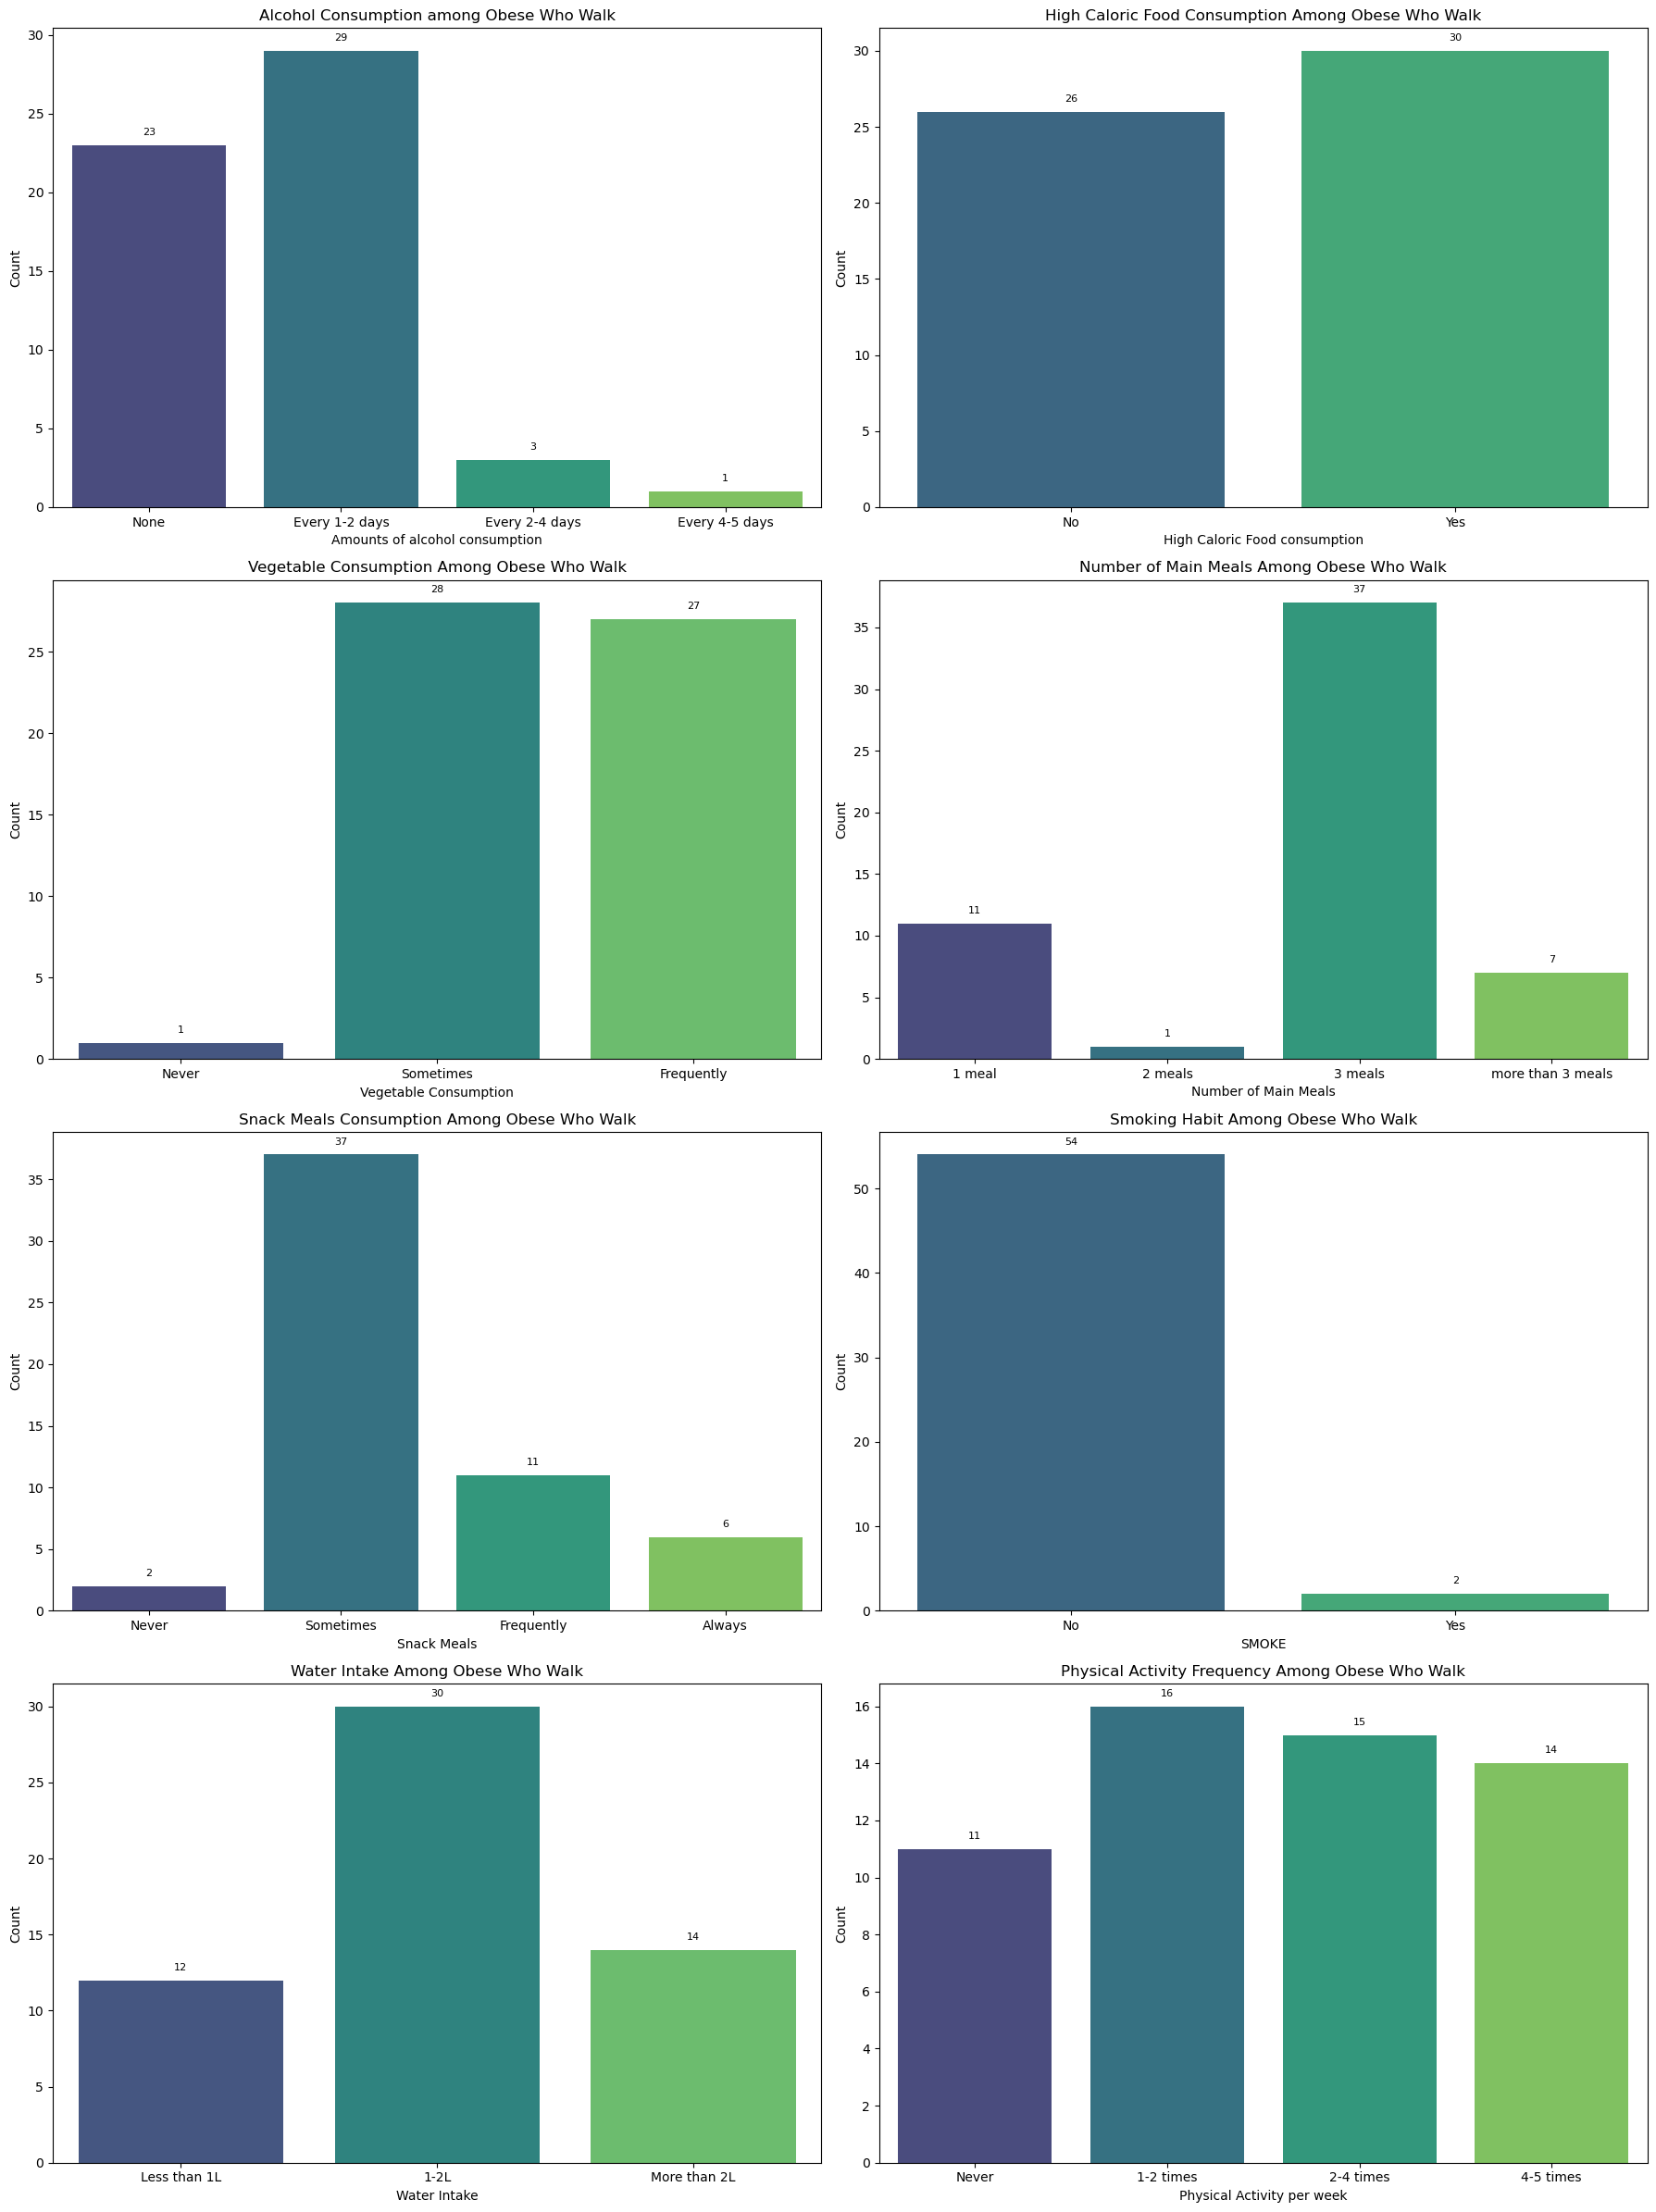

In [23]:
walkers = ob_df[ob_df['Walking'] == 1]

#Bar Plot
plt.figure(figsize=(18, 24))

#First Plot
plt.subplot(4, 2, 1)
sns.countplot(data=walkers, x='CALC', palette='viridis')
plt.title('Alcohol Consumption among Obese Who Walk')
plt.xlabel('Amounts of alcohol consumption')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['None', 'Every 1-2 days', 'Every 2-4 days', 'Every 4-5 days'])

annotate_barplot_int(plt.gca(), df_eating_long, 'CALC', 'count')


#Second Plot
plt.subplot(4, 2, 2)
sns.countplot(data=walkers, x='FAVC', palette='viridis')
plt.title('High Caloric Food Consumption Among Obese Who Walk')
plt.xlabel('High Caloric Food consumption')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

annotate_barplot_int(plt.gca(), df_eating_long, 'FAVC', 'count')


#Third Plot
plt.subplot(4, 2, 3)
sns.countplot(data=walkers, x='FCVC', palette='viridis')
plt.title('Vegetable Consumption Among Obese Who Walk')
plt.xlabel('Vegetable Consumption')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Never', 'Sometimes', 'Frequently'])

annotate_barplot_int(plt.gca(), df_eating_long, 'FCVC', 'count')

#Fourth Plot
plt.subplot(4, 2, 4)
sns.countplot(data=walkers, x='NCP', palette='viridis')
plt.title('Number of Main Meals Among Obese Who Walk')
plt.xlabel('Number of Main Meals')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['1 meal', '2 meals', '3 meals', 'more than 3 meals'])

annotate_barplot_int(plt.gca(), df_eating_long, 'NCP', 'count')

#Fifth Plot
plt.subplot(4, 2, 5)
sns.countplot(data=walkers, x='CAEC', palette='viridis')
plt.title('Snack Meals Consumption Among Obese Who Walk')
plt.xlabel('Snack Meals')
plt.ylabel('Count')
annotate_barplot_int(plt.gca(), df_eating_long, 'CAEC', 'count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Never', 'Sometimes', 'Frequently', 'Always'])

#sixth Plot
plt.subplot(4, 2, 6)
sns.countplot(data=walkers, x='SMOKE', palette='viridis')
plt.title('Smoking Habit Among Obese Who Walk')
plt.xlabel('SMOKE')
plt.ylabel('Count')
annotate_barplot_int(plt.gca(), df_eating_long, 'SMOKE', 'count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

#Seventh Plot
plt.subplot(4, 2, 7)
sns.countplot(data=walkers, x='CH2O', palette='viridis')
plt.title('Water Intake Among Obese Who Walk')
plt.xlabel('Water Intake')
plt.ylabel('Count')
annotate_barplot_int(plt.gca(), df_eating_long, 'CH2O', 'count')
plt.xticks(ticks=[0, 1, 2], labels=['Less than 1L', '1-2L', 'More than 2L'])

#Eighth Plot
plt.subplot(4, 2, 8)
sns.countplot(data=walkers, x='FAF', palette='viridis')
plt.title('Physical Activity Frequency Among Obese Who Walk')
plt.xlabel('Physical Activity per week')
plt.ylabel('Count')
annotate_barplot_int(plt.gca(), df_eating_long, 'FAF', 'count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Never', '1-2 times', '2-4 times', '4-5 times'])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

.כאשר בחנו את הרגלי ההתניידות של משתתפי המחקר הבחנו כי בקרב האוכלוסייה של ההולכים ברגל קיים אחוז מאוד נמוך של מאובחנים בהשמנת יתר

.מכאן, הנחנו כי אוכלוסייה זו בעלת מודעות גדולה יותר לאורח חיים בריא ורצינו לחקור זאת


.בנוסף רצינו לבדוק את הקשר בין אוכלוסייה זו המייצגת את אחוז החולים הנמוך ביותר לבין הפרמטר של היסטורייה משפחתית של השמנת יתר המייצג את האחוז הגבוה ביותר של חולים 

.מהצלבת פרמטרים אלה הופתענו לגלות שגם בקרב אוכלוסית ההולכים אכן קיים רוב עם היסטוריה משפחתית של השמנת יתר ומתוך זה הסקנו כי אנשים אלה מנהלים אורח חיים נכון ומדוייק להימנעות מהשמנת יתר גם כאשר קיים עבר משפחתי

:ניתחנו את אורח החיים של אוכלוסייה זאת במגוון פרמטרים


.צריכת אלכוהול, צריכת אוכל עתיר בקלוריות, צריכת ירקות, מספר ארוחות עיקריות ביום ומספר ארוחות ביניים, הרגלי עישון, הרגלי שתיית מים ותדירות פעילות גופנית

לסיכום, נסיק כי למרות שראינו במסקנה הראשונה את ההשפעה הגדולה של היסטוריה משפחתית, אפשרי בהחלט להימנע מהשמנת יתר גם כאשר קיים עבר משפחתי וזאת תוך כדי הקפדה על אורח חיים בריא בעל מאפיינים דומים לאוכלוסייה המוצגת לעיל אשר "ניצחו" את הסיכויים ונמנעו מהשמנת יתר